In [1]:
# Look into the two other datasets as well
# Do we really need pca?
# Keep the old columns?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df_1 = pd.read_excel('../Data/Self assessment and Test Center.xlsx', engine='openpyxl')
df_2 = pd.read_excel('../Data/TS2018-2019_AISS.xlsx', engine='openpyxl')
df_3 = pd.read_excel('../Data/Variables and questions.xlsx', engine='openpyxl')

In [3]:
# Impute instead of removing rowswith missing values (think people who are the same age)

print(df_1.info)
# print(df_2.head())
# print(df_3.head())

<bound method DataFrame.info of                                        Id  lft_jr lft_cat  g  JO_team  Finals  \
0    014419E9-9730-41DC-8813-337E83118E63      12   11_12  1        0       0   
1    0373C5A4-0433-421D-81F5-F3D2C4B51251       7   00_08  0        0       0   
2    04D241B6-F1BB-4C48-8457-9F9127AE918C       8   00_08  0        0       0   
3    0578E3BC-DA4B-4B57-8D6A-F071804FFF2E      11   11_12  0        0       0   
4    06441EB7-3B47-453A-A71B-614B576B7215       8   00_08  1        0       0   
..                                    ...     ...     ... ..      ...     ...   
273  F678B02A-F941-4D03-833F-276BBBCE7475      10   09_10  0        0       0   
274  F9C7E58D-CDDC-494C-8124-BD07B97F5217       9   09_10  0        0       0   
275  FC06A844-0A2F-4027-BB6B-5D92B35951AC      10   09_10  0        0       0   
276  FE4BA400-8125-45A9-967C-5910D20824D4      12   11_12  0        0       0   
277  FECB0630-8FEE-4F4F-82D3-6F748A5E707E      11   11_12  0        0       0

# Removing rows with missing values

In [4]:
# Remove rows with missing values
df_1 = df_1.dropna()

In [5]:
df_1.info

<bound method DataFrame.info of                                        Id  lft_jr lft_cat  g  JO_team  Finals  \
0    014419E9-9730-41DC-8813-337E83118E63      12   11_12  1        0       0   
1    0373C5A4-0433-421D-81F5-F3D2C4B51251       7   00_08  0        0       0   
2    04D241B6-F1BB-4C48-8457-9F9127AE918C       8   00_08  0        0       0   
5    06C4C149-D062-4F88-8BEE-6F432EDF5E3C       8   00_08  0        0       0   
6    082D4B57-1D1E-434C-A1CA-07A8A7B4BCD3      15  15plus  0        0       1   
..                                    ...     ...     ... ..      ...     ...   
273  F678B02A-F941-4D03-833F-276BBBCE7475      10   09_10  0        0       0   
274  F9C7E58D-CDDC-494C-8124-BD07B97F5217       9   09_10  0        0       0   
275  FC06A844-0A2F-4027-BB6B-5D92B35951AC      10   09_10  0        0       0   
276  FE4BA400-8125-45A9-967C-5910D20824D4      12   11_12  0        0       0   
277  FECB0630-8FEE-4F4F-82D3-6F748A5E707E      11   11_12  0        0       0

# Feature engineering : 
### Making a new feature 'bmi' from weight and height

In [6]:
# Calculating BMI from weight and height
# Formula : ( weight (kg) / height (cm) / height (cm) )x 10,000
df_1['bmi'] = ((df_1['X109_08']/df_1['X109_07']/df_1['X109_07'])*10000).round(2)

# Some rows for both weight and height have the value 0
df_1.loc[df_1['X109_07'] == 0]
df_1.loc[df_1['X109_08'] == 0]

# That results in some rows in bmi having the values 0 or inf
df_1['bmi'].head(10)

# We remove rows with the value 'inf' or 0 from bmi
df_1 = df_1[df_1['bmi'] != float("inf")]
df_1 = df_1[df_1['bmi'] != 0]

### Making a newfeature 'overall_physical_abilities' from acceleration_time, sprinting_speed, jumping_power

In [7]:
# Calculating overall_physical_abilities from acceleration_time, sprinting_speed, jumping_power
# Formula : overall_physical_abilities = (acceleration_time + sprinting_speed + jumping_power) / 3
df_1['overall_physical_abilities'] = ((df_1['X109_01'] + df_1['X109_02'] + df_1['X109_04'])/3).round(0).astype(int)

df_1['overall_physical_abilities'].head(10)


0     3
5     4
6     4
7     4
9     2
11    3
12    4
14    4
15    4
17    1
Name: overall_physical_abilities, dtype: int64

In [8]:
df_1

,Id,lft_jr,lft_cat,g,JO_team,Finals,X01_01,X01_02,X01_03,X01_04,...,X108_04,X108_05,X109_01,X109_02,X109_04,X109_06,X109_07,X109_08,bmi,overall_physical_abilities
0,014419E9-9730-41DC-8813-337E83118E63,12,11_12,1,0,0,5,5,5,5,...,71,1,3,3,3,1,162,49.0,18.67,3
5,06C4C149-D062-4F88-8BEE-6F432EDF5E3C,8,00_08,0,0,0,3,5,5,5,...,66,5,5,3,5,3,146,38.0,17.83,4
6,082D4B57-1D1E-434C-A1CA-07A8A7B4BCD3,15,15plus,0,0,1,2,4,4,5,...,111,3,3,3,5,4,179,63.0,19.66,4
7,090DA1A1-B09F-4C4F-B344-E2773587EF82,12,11_12,0,0,0,5,5,5,5,...,79,4,2,5,5,3,153,39.0,16.66,4
9,0A1AFF0B-078C-4938-B484-AEB3688ACA51,10,09_10,0,0,0,4,5,4,5,...,71,3,1,3,2,4,146,37.0,17.36,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F3E964DC-28B1-475D-91A3-06B48D84F1E0,14,13_14,0,0,0,4,4,4,5,...,84,2,1,1,4,2,172,47.0,15.89,2
272,F55129D8-C9ED-4E69-9E7E-716C8366D751,11,11_12,0,0,0,5,5,5,4,...,75,5,3,4,4,3,158,41.0,16.42,4
275,FC06A844-0A2F-4027-BB6B-5D92B35951AC,10,09_10,0,0,0,5,5,5,5,...,78,3,1,3,4,3,149,36.0,16.22,3
276,FE4BA400-8125-45A9-967C-5910D20824D4,12,11_12,0,0,0,5,5,5,5,...,61,4,1,1,3,1,162,42.0,16.00,2


In [9]:
# Getting rid of none necessary columns, which in our case are the nominal ones
numeric_columns = df_1.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
df_1 = df_1[numeric_columns]
print(df_1.head())

   lft_jr  g  JO_team  Finals  X01_01  X01_02  X01_03  X01_04  X01_05  X01_06  \
0      12  1        0       0       5       5       5       5       5       5   
5       8  0        0       0       3       5       5       5       5       5   
6      15  0        0       1       2       4       4       5       5       5   
7      12  0        0       0       5       5       5       5       5       5   
9      10  0        0       0       4       5       4       5       5       4   

   ...  X108_04  X108_05  X109_01  X109_02  X109_04  X109_06  X109_07  \
0  ...       71        1        3        3        3        1      162   
5  ...       66        5        5        3        5        3      146   
6  ...      111        3        3        3        5        4      179   
7  ...       79        4        2        5        5        3      153   
9  ...       71        3        1        3        2        4      146   

   X109_08    bmi  overall_physical_abilities  
0     49.0  18.67         

In [10]:
df_1.X108_04

0       71
5       66
6      111
7       79
9       71
      ... 
271     84
272     75
275     78
276     61
277      0
Name: X108_04, Length: 221, dtype: int64

# X108_04 (shooting power) tranformed to Likert scale

In [11]:
# Select the column to transform
column = df_1["X108_04"]

# Normalize the values in the column
min_value = column.min()
max_value = column.max()
normalized_column = (column - min_value) / (max_value - min_value)

# Transform the values to a Likert scale
likert_column = normalized_column * 5

# Round the values to the nearest integer
likert_column = np.round(likert_column)

# Replace the original column with the Likert scale column
df_1["X108_04"] = likert_column

<ipython-input-11-367cbc07dba1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["X108_04"] = likert_column


In [12]:
df_1["X108_04"] = df_1["X108_04"].astype(int)

<ipython-input-12-3383eb2bfccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["X108_04"] = df_1["X108_04"].astype(int)


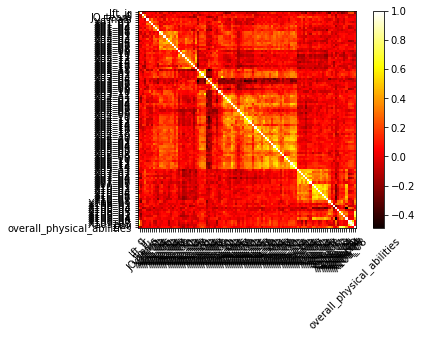

In [13]:
# Compute the correlation matrix
corr = df_1.corr()

# Plot the correlation matrix using a heatmap
plt.figure()
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df_1.columns)), df_1.columns, rotation=45)
plt.yticks(range(len(df_1.columns)), df_1.columns)
plt.show()

In [14]:
corr

,lft_jr,g,JO_team,Finals,X01_01,X01_02,X01_03,X01_04,X01_05,X01_06,...,X108_04,X108_05,X109_01,X109_02,X109_04,X109_06,X109_07,X109_08,bmi,overall_physical_abilities
lft_jr,1.000000,0.299618,-0.092192,-0.011435,0.095883,0.025213,0.097132,-0.047637,-0.057727,0.082836,...,0.231015,-0.137909,-0.015866,0.023790,0.010599,0.158685,0.787334,0.773498,0.561706,0.023141
g,0.299618,1.000000,-0.080988,-0.090131,0.055086,0.049870,0.045880,0.043782,-0.044944,0.110374,...,0.046511,-0.137442,-0.073688,-0.230821,-0.187099,-0.108874,0.175030,0.209987,0.217549,-0.188693
JO_team,-0.092192,-0.080988,1.000000,0.371818,0.063657,0.056986,-0.008008,0.050373,0.062959,0.048915,...,-0.161949,0.076818,0.006561,-0.011910,0.031370,0.029519,-0.060839,-0.047305,-0.057454,-0.002249
Finals,-0.011435,-0.090131,0.371818,1.000000,-0.072900,0.020781,0.021038,0.074869,-0.050224,0.131557,...,-0.113624,0.096844,0.057641,0.014643,0.012140,0.136271,-0.034578,0.001765,0.029939,0.045358
X01_01,0.095883,0.055086,0.063657,-0.072900,1.000000,0.169400,0.333641,0.117586,0.152128,0.054847,...,-0.007363,-0.093354,0.005340,0.026794,-0.064255,0.077933,0.059730,0.059101,0.054555,0.004075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X109_06,0.158685,-0.108874,0.029519,0.136271,0.077933,0.097074,0.113082,0.073915,0.036638,0.004930,...,-0.492574,-0.016485,0.249858,0.380658,0.217532,1.000000,0.015513,0.024563,0.036463,0.381687
X109_07,0.787334,0.175030,-0.060839,-0.034578,0.059730,0.022275,0.117804,-0.097431,-0.118841,0.059808,...,0.333873,-0.045450,0.047148,0.081663,0.020285,0.015513,1.000000,0.907915,0.523262,0.067514
X109_08,0.773498,0.209987,-0.047305,0.001765,0.059101,-0.034125,0.094393,-0.075522,-0.106868,0.050376,...,0.305061,-0.094830,0.051312,0.090796,0.015637,0.024563,0.907915,1.000000,0.823798,0.078425
bmi,0.561706,0.217549,-0.057454,0.029939,0.054555,-0.086271,0.068491,-0.009062,-0.058441,0.029069,...,0.184851,-0.133974,0.033862,0.066193,-0.000345,0.036463,0.523262,0.823798,1.000000,0.058603


# Standardize the Data
PCA is affected by the scale, so we have to scale the features using. StandardScaler whcih will help us standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

Since we don't want to affecte the ordinal nature of the Likert scale data, we only use StandardScaler for columns that are not likert scale.

In [15]:
# columns we use standardize with : 'bmi', 'X109_07', 'X109_08'
from sklearn.preprocessing import StandardScaler
features = ['bmi', 'X109_07', 'X109_08']

# Separating out the features
x = df_1.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Adding the resulting np array to the main dataframe
stand_df = pd.DataFrame(data = x, columns = features)

In [16]:
df_1.reset_index(inplace = True)
df_1

,index,lft_jr,g,JO_team,Finals,X01_01,X01_02,X01_03,X01_04,X01_05,...,X108_04,X108_05,X109_01,X109_02,X109_04,X109_06,X109_07,X109_08,bmi,overall_physical_abilities
0,0,12,1,0,0,5,5,5,5,5,...,3,1,3,3,3,1,162,49.0,18.67,3
1,5,8,0,0,0,3,5,5,5,5,...,3,5,5,3,5,3,146,38.0,17.83,4
2,6,15,0,0,1,2,4,4,5,5,...,5,3,3,3,5,4,179,63.0,19.66,4
3,7,12,0,0,0,5,5,5,5,5,...,4,4,2,5,5,3,153,39.0,16.66,4
4,9,10,0,0,0,4,5,4,5,5,...,3,3,1,3,2,4,146,37.0,17.36,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,271,14,0,0,0,4,4,4,5,5,...,4,2,1,1,4,2,172,47.0,15.89,2
217,272,11,0,0,0,5,5,5,4,5,...,3,5,3,4,4,3,158,41.0,16.42,4
218,275,10,0,0,0,5,5,5,5,5,...,4,3,1,3,4,3,149,36.0,16.22,3
219,276,12,0,0,0,5,5,5,5,5,...,3,4,1,1,3,1,162,42.0,16.00,2


In [17]:
df_1[features] = stand_df

/Users/gebruiker/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
df_1[features]

,bmi,X109_07,X109_08
0,0.455053,0.547626,0.527318
1,0.080104,-0.570391,-0.412499
2,0.896956,1.735520,1.723449
3,-0.442146,-0.081259,-0.327061
4,-0.129689,-0.570391,-0.497937
...,...,...,...
216,-0.785849,1.246387,0.356442
217,-0.549274,0.268122,-0.156185
218,-0.638548,-0.360763,-0.583375
219,-0.736749,0.547626,-0.070747


In [19]:
# Get the data values from the dataframe
X = df_1.drop('Finals', axis=1)
X = df_1.values

# Creating a PCA object with 0.99 as the target explained variance
pca = PCA(n_components=0.99)

# Fiting the PCA model to the data
pca.fit(X)

# Transforming the data using the fitted PCA model
X_pca = pca.transform(X)

# Creating a new dataframe from the transformed data
column_names = ['PCA_' + str(i+1) for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(data=X_pca, columns=column_names)

In [20]:
df_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,139.084855,-2.620712,-0.807782,-2.580687,-1.726806,-0.142885
1,134.062161,-0.639310,4.666299,-1.156451,-2.173605,-2.185740
2,133.100962,-6.036333,-1.852502,1.546956,0.754391,0.535514
3,132.082255,-2.557229,0.391823,0.122889,0.876242,-2.976049
4,130.044388,5.202296,1.257649,1.823237,-0.227866,1.141410
...,...,...,...,...,...,...
216,-131.910372,-2.762326,-4.037845,-1.772372,-0.504764,1.127906
217,-132.936170,-0.580250,0.230993,0.347347,-1.586665,-1.821790
218,-135.947417,1.692283,0.438883,0.483011,-1.735603,-0.919722
219,-136.945899,2.730090,-2.038709,-1.526667,-3.594653,1.828680


In [21]:
print(pca.explained_variance_ratio_)

[9.84946189e-01 1.82604713e-03 1.09319831e-03 1.03951553e-03
 9.40355871e-04 8.34437998e-04]


# Spliting the dataframe into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into input and output variables
X = df_pca
y = df_1['Finals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Applying logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8


# Applying KNN

## Before applying KNN we would like to know the number of neighbors.
In our case we used GridSearchCV which gave us the value : 7

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)

# Training the model
neigh.fit(X_train, y_train)

# Make predictions on new data
y_pred = neigh.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8


# Applying Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Training the model
nb.fit(X_train, y_train)

# Make predictions on new data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8222222222222222


# Applying SVM

In [26]:
from sklearn.svm import SVC
svm = SVC()

# Training the model
svm.fit(X_train, y_train)

# Make predictions on new data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8


# Applying decision trees

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Training the model
dt.fit(X_train, y_train)

# Make predictions on new data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7555555555555555


# Cross-validation

Because the dataset is small, we use cross validation to prevent overfitting and improve the reliability of the results.

In [29]:
# Precision, recall, f1

from sklearn.model_selection import KFold

# Creating the KFold object with 5 splits
kf = KFold(n_splits=5)

# We transfor X and y to numpy arrays
X = X.values
y = y.values

# Looping through the splits
for train_index, test_index in kf.split(X):
    # Getting the training and testing data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training the logistic regression classifier on the training data
    lr_clf = LogisticRegression()
    lr_clf.fit(X_train, y_train)

    # Training the KNN classifier on the training data
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(X_train, y_train)

    # Training the naive Bayes classifier on the training data
    nb_clf = GaussianNB()
    nb_clf.fit(X_train, y_train)

    # Training the SVM classifier on the training data
    svm_clf = SVC()
    svm_clf.fit(X_train, y_train)
    
    # Training the dt classifier on the training data
    dt_clf = DecisionTreeClassifier()
    dt_clf.fit(X_train, y_train)

    # Evaluating the logistic regression classifier on the testing data
    lr_accuracy = lr_clf.score(X_test, y_test)
    print("Logistic regression accuracy: ", lr_accuracy)

    # Evaluating the KNN classifier on the testing data
    knn_accuracy = knn_clf.score(X_test, y_test)
    print("KNN accuracy: ", knn_accuracy)

    # Evaluating the naive Bayes classifier on the testing data
    nb_accuracy = nb_clf.score(X_test, y_test)
    print("Naive Bayes accuracy: ", nb_accuracy)

    # Evaluating the SVM classifier on the testing data
    svm_accuracy = svm_clf.score(X_test, y_test)
    print("SVM accuracy: ", svm_accuracy)
    
    # Evaluating the dt classifier on the testing data
    dt_accuracy = dt_clf.score(X_test, y_test)
    print("Decision trees accuracy: ", dt_accuracy)
    
    print('\n')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

# Notes

- we could create a new variable that represents the overall dribbling ability of a player by combining their dribbling time and footwork time.
- We could also create a new variable that represents their overall shooting ability by combining their shooting time, shot power, and passing/ball control time.


    - Example 1 : Overall_shooting_ability = (Shooting_time * 0.4) + (Shot_power * 0.3) + (Passing/ball control time * 0.3)
    
    
- Since a big constraint for us is the small size of the dataset, the best classifiers we can use are:

Decision trees - K-nearest neighbors (KNN) - Support vector machines (SVMs) - Naive Bayes

- Neural networks require a large amount of data to learn complex patterns and make accurate predictions. With a small dataset, it may be difficult for the neural network to learn these patterns and the model may not perform as well as expected.